In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
gpl = pd.read_csv('googleplaystore.csv')
gpl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [3]:
gpl.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
def size (row):
    if 'M' in row:
        row_mod = row.replace('M','')
        result = float(row_mod) * 1000000
    elif 'k' in row:
        row_mod = row.replace('k','')
        result = float(row_mod) * 1000
    else:
        result = row
    return result

In [5]:
gpl['Size_float'] = gpl['Size'].apply(size)
gpl_2 = gpl.loc[gpl['Size_float'] != 'Varies with device'].loc[gpl['Size_float'] != '1,000+']
gpl_2['Size_float'] = gpl_2['Size_float'].astype('float64')
gpl_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9145 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9145 non-null   object 
 1   Category        9145 non-null   object 
 2   Rating          7729 non-null   float64
 3   Reviews         9145 non-null   object 
 4   Size            9145 non-null   object 
 5   Installs        9145 non-null   object 
 6   Type            9145 non-null   object 
 7   Price           9145 non-null   object 
 8   Content Rating  9145 non-null   object 
 9   Genres          9145 non-null   object 
 10  Last Updated    9145 non-null   object 
 11  Current Ver     9137 non-null   object 
 12  Android Ver     9143 non-null   object 
 13  Size_float      9145 non-null   float64
dtypes: float64(2), object(12)
memory usage: 1.0+ MB


In [6]:
gpl_2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_float
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19000000.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14000000.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8700000.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25000000.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2800000.0


In [7]:
gpl_category = gpl_2[['Category', 'App']].groupby('Category').count().sort_values(by = 'App')

<AxesSubplot:xlabel='Category'>

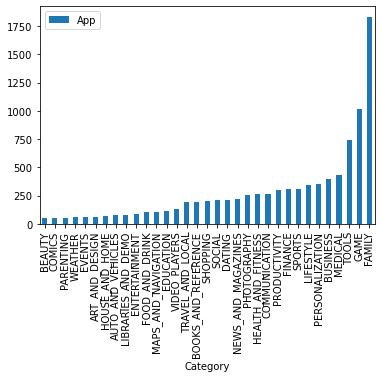

In [8]:
gpl_category.plot(kind='bar')

Можно выделить топ 3 категори в google pley приложений в которых значительно больше чем в остальных категориях. Family, Game и Tools. При этом приложений для детей Family примерно в 2 раза больше чем приложений в 2х других категориях. Возможно это связано с тем, что они давольно "приметивны" и их проще создавать? Проверим средний размаер приложения по категориям

In [9]:
import seaborn as sns

<AxesSubplot:xlabel='Category', ylabel='Size_float'>

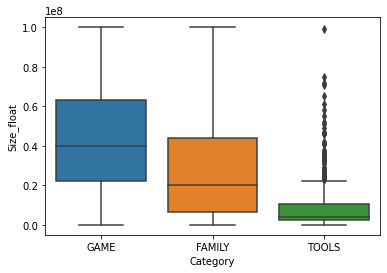

In [10]:
gpl_top_category = gpl_2.loc[(gpl_2['Category'] == 'FAMILY') | (gpl_2['Category'] == 'GAME') | (gpl_2['Category'] == 'TOOLS')]
sns.boxplot(x='Category', y='Size_float',data=gpl_top_category)

Средний размер приложения в категории Family действительно меньше чем средний размер в категории Game, но размер Tools еще меньше. Посмотрим на распределение платных и бесплатных приложений по категориям. 

In [11]:
gpl_type = gpl_2.loc[(gpl_2['Category'] == 'FAMILY') | (gpl_2['Category'] == 'GAME') | (gpl_2['Category'] == 'TOOLS')].pivot_table(columns = 'Type', index = 'Category', values = 'App', aggfunc = 'count')
gpl_type

Type,Free,Paid
Category,,
FAMILY,1654,178
GAME,936,79
TOOLS,670,69


<AxesSubplot:xlabel='Category'>

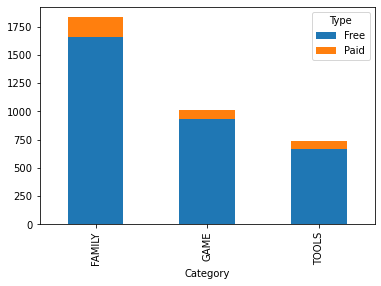

In [12]:
gpl_type.plot(kind='bar', stacked=True)

Подавляющее большинство приложений бесплатные. Визуально кажется что в категории Family доля платных приложений больше чем в 2х других.

In [13]:
gpl_type_2 = gpl_2.pivot_table(columns = 'Type', index = 'Category', values = 'App', aggfunc = 'count')
gpl_type_2['Total'] = gpl_type_2['Free'] + gpl_type_2['Paid']
gpl_type_2['Paid%'] = gpl_type_2['Paid'] / gpl_type_2['Total'] * 100
gpl_type_2.sort_values(by='Paid%', ascending = False)

Type,Free,Paid,Total,Paid%
Category,,,,
MEDICAL,336.0,98.0,434.0,22.580645
PERSONALIZATION,276.0,79.0,355.0,22.253521
BOOKS_AND_REFERENCE,170.0,27.0,197.0,13.705584
WEATHER,51.0,6.0,57.0,10.526316
FAMILY,1654.0,178.0,1832.0,9.716157
TOOLS,670.0,69.0,739.0,9.336942
COMMUNICATION,242.0,23.0,265.0,8.679245
PRODUCTIVITY,279.0,24.0,303.0,7.920792
GAME,936.0,79.0,1015.0,7.783251


Проверка в табличном виде показала, что доля примерно одинакова в этих 3х категориях. И больше всего платных приложений в категории MEDICAL

In [14]:
def instals(row):
    if '+' in row:
        row = row.replace('+', '')
        row = row.replace(',', '')
    return row

In [15]:
gpl_2['Installs'] = gpl_2['Installs'].apply(instals).astype('float64')
gpl_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9145 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9145 non-null   object 
 1   Category        9145 non-null   object 
 2   Rating          7729 non-null   float64
 3   Reviews         9145 non-null   object 
 4   Size            9145 non-null   object 
 5   Installs        9145 non-null   float64
 6   Type            9145 non-null   object 
 7   Price           9145 non-null   object 
 8   Content Rating  9145 non-null   object 
 9   Genres          9145 non-null   object 
 10  Last Updated    9145 non-null   object 
 11  Current Ver     9137 non-null   object 
 12  Android Ver     9143 non-null   object 
 13  Size_float      9145 non-null   float64
dtypes: float64(3), object(11)
memory usage: 1.0+ MB


In [16]:
gpl_category_2 = gpl_2[['Category', 'Installs']].groupby('Category').sum().sort_values(by = 'Installs')
gpl_category_2.head()

,Installs
Category,
EVENTS,10672151.0
BEAUTY,13696950.0
COMICS,17586150.0
PARENTING,23971010.0
AUTO_AND_VEHICLES,43770211.0


<AxesSubplot:ylabel='Category'>

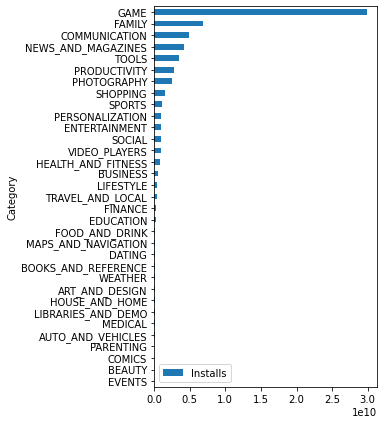

In [17]:
gpl_category_2.plot(kind='barh', figsize=(4,7))

Хоть приложения из категории family лидируют по количеству, по популяроности они на 2 мести. На 1м с большим отрывом приложения из категории Games

<AxesSubplot:ylabel='Frequency'>

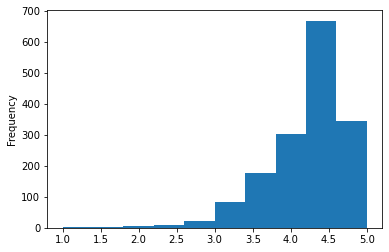

In [36]:
top_1 = gpl_2.loc[gpl_2['Category'] == 'FAMILY']
top_1.Rating.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

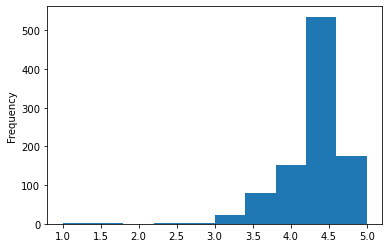

In [37]:
top_2 = gpl_2.loc[gpl_2['Category'] == 'GAME']
top_2.Rating.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

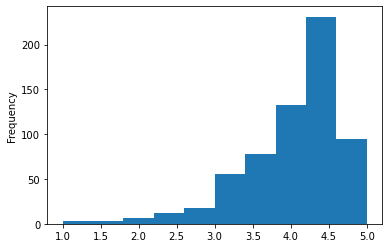

In [38]:
top_2 = gpl_2.loc[gpl_2['Category'] == 'TOOLS']
top_2.Rating.plot(kind='hist')

РАспределение оценок по топ 3 категорий по количеству приложений выглядят примерно одинаково. 4,5 самая частая оценка.